## Expertensystem EDA

In [2]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Daten einlesen
df = pd.read_csv('hr_train.csv', sep=',', decimal='.')

In [20]:
df.shape

(10000, 11)

In [21]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0,0.65,0.96,5,226,2,1,0,0,marketing,medium
1,1,0.88,0.80,3,166,2,0,0,0,IT,low
2,2,0.69,0.98,3,214,2,0,0,0,sales,low
3,3,0.41,0.47,2,154,3,0,1,0,sales,low
4,4,0.87,0.76,5,254,2,1,0,0,hr,low


In [22]:
df.dtypes

id                         int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

### NULL-Werte prüfen

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
id                       10000 non-null int64
satisfaction_level       10000 non-null float64
last_evaluation          10000 non-null float64
number_project           10000 non-null int64
average_montly_hours     10000 non-null int64
time_spend_company       10000 non-null int64
Work_accident            10000 non-null int64
left                     10000 non-null int64
promotion_last_5years    10000 non-null int64
department               10000 non-null object
salary                   10000 non-null object
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Datei enthält keine Spalten mit NULL-Werten. Keine dahingehende Datenbereinigung erforderlich.

### Ausprägungen der Spalten departement und salary überprüfen

In [26]:
df.columns

Index(['id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [27]:
df['department'].value_counts()

sales          2763
technical      1854
support        1495
IT              810
product_mng     601
marketing       586
RandD           509
hr              505
accounting      502
management      375
Name: department, dtype: int64

In [28]:
df['salary'].value_counts()

low       4912
medium    4274
high       814
Name: salary, dtype: int64

In [29]:
for col in df.select_dtypes(include=[np.object]):
    print('transforming', col)
    df[col] = df[col].astype('category')

transforming department
transforming salary


In [30]:
df.dtypes

id                          int64
satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
department               category
salary                   category
dtype: object

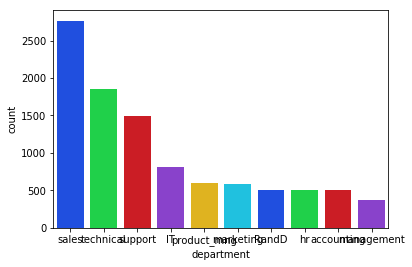

In [35]:
sns.countplot(x='department', data=df, palette='bright', order=df['department'].value_counts().index);

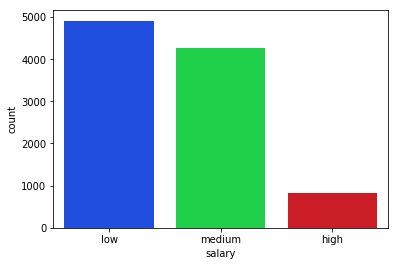

In [33]:
sns.countplot(x='salary', data=df, palette='bright', order=df['salary'].value_counts().index);